In [1]:
# 라이브러리
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [3]:
train.head()

,ID,img_path,mask_path,나이,수술연월일,진단명,암의 위치,암의 개수,암의 장경,NG,...,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
0,BC_01_0001,./train_imgs/BC_01_0001.png,-,63,2015-10-23,1,2,1,19.0,2.0,...,8.0,1.0,6.0,12.0,0.0,1.0,NaN,NaN,NaN,0
1,BC_01_0002,./train_imgs/BC_01_0002.png,-,51,2015-10-28,1,1,1,22.0,3.0,...,NaN,0.0,NaN,70.0,0.0,0.0,NaN,NaN,NaN,1
2,BC_01_0003,./train_imgs/BC_01_0003.png,-,37,2015-10-29,1,2,1,NaN,2.0,...,7.0,1.0,4.0,7.0,0.0,1.0,NaN,NaN,0.0,0
3,BC_01_0004,./train_imgs/BC_01_0004.png,-,54,2016-03-08,1,2,1,0.0,3.0,...,NaN,0.0,NaN,1.0,1.0,3.0,NaN,NaN,NaN,0
4,BC_01_0005,./train_imgs/BC_01_0005.png,-,57,2015-10-30,1,2,1,8.0,2.0,...,8.0,0.0,NaN,8.0,1.0,2.0,1.0,5.44,NaN,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   object 
 1   img_path           1000 non-null   object 
 2   mask_path          1000 non-null   object 
 3   나이                 1000 non-null   int64  
 4   수술연월일              1000 non-null   object 
 5   진단명                1000 non-null   int64  
 6   암의 위치              1000 non-null   int64  
 7   암의 개수              1000 non-null   int64  
 8   암의 장경              931 non-null    float64
 9   NG                 949 non-null    float64
 10  HG                 914 non-null    float64
 11  HG_score_1         908 non-null    float64
 12  HG_score_2         908 non-null    float64
 13  HG_score_3         911 non-null    float64
 14  DCIS_or_LCIS_여부    1000 non-null   int64  
 15  DCIS_or_LCIS_type  126 non-null    float64
 16  T_category         996 no

In [6]:
train.describe()

,나이,진단명,암의 위치,암의 개수,암의 장경,NG,HG,HG_score_1,HG_score_2,HG_score_3,...,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
count,1000.000000,1000.000000,1000.000000,1000.000000,931.000000,949.000000,914.000000,908.000000,908.000000,911.000000,...,703.000000,999.000000,547.000000,765.000000,986.000000,976.000000,247.000000,175.000000,55.000000,1000.000000
mean,53.679000,1.289000,1.561000,1.133000,18.375564,2.070601,1.897155,2.588106,2.144273,1.428101,...,7.014225,0.641642,6.049360,18.037229,0.247465,1.253074,0.129555,2.460457,0.145455,0.514000
std,11.253471,0.796312,0.559099,0.339745,12.037144,0.692234,0.713147,0.654011,0.655820,0.714866,...,1.125879,0.479758,2.734821,18.846473,0.431758,0.939444,0.336495,7.399121,0.524164,0.500054
min,25.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,1.000000,1.000000,1.000000,11.000000,2.000000,1.000000,2.000000,2.000000,1.000000,...,7.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.130000,0.000000,0.000000
50%,52.000000,1.000000,2.000000,1.000000,17.000000,2.000000,2.000000,3.000000,2.000000,1.000000,...,7.000000,1.000000,6.000000,10.000000,0.000000,1.000000,0.000000,1.270000,0.000000,1.000000
75%,62.000000,1.000000,2.000000,1.000000,23.000000,3.000000,2.000000,3.000000,3.000000,2.000000,...,8.000000,1.000000,7.000000,25.000000,0.000000,2.000000,0.000000,1.675000,0.000000,1.000000
max,93.000000,4.000000,3.000000,2.000000,110.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,8.000000,1.000000,54.000000,97.000000,1.000000,3.000000,1.000000,94.000000,2.000000,1.000000


In [7]:
train['암의 장경'] = train['암의 장경'].fillna(train['암의 장경'].mean())
train = train.fillna(0)

test['암의 장경'] = test['암의 장경'].fillna(test['암의 장경'].mean())
test = test.fillna(0)

In [8]:
train.drop(columns=['ID', 'img_path', 'mask_path', '수술연월일'], inplace=True )
test.drop(columns=['ID', 'img_path', '수술연월일'], inplace=True )

In [9]:
X = train.iloc[:,:23]
Y = train.iloc[:,23:]
Y

,N_category
0,0
1,1
2,0
3,0
4,0
...,...
995,1
996,0
997,1
998,0


In [14]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [19]:
import xgboost as xgb
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

import xgboost as xgb
from xgboost import plot_importance
import optuna

In [20]:
def RF_objective(trial: optuna.trial.Trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric':'auc',
        'booster':'gbtree',
        'n_estimators': trial.suggest_int("n_estimators", 100, 1000, step=10),
        "max_depth": trial.suggest_int("max_depth", 4, 10),
        
        # 'tree_method':'gpu_hist', 'predictor':'gpu_predictor', 'gpu_id': 0, # GPU 사용시
        "tree_method": 'exact', 'gpu_id': -1,  # CPU 사용시
        
        "gamma": trial.suggest_float("gamma", 0.1, 1.0, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.5, 1.0),
        "colsample_bynode": trial.suggest_float("colsample_bynode", 0.5, 1.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-2, 1),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-2, 1),
        # 'scale_pos_weight': scale_pos_weight
        # 'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 5, 20, step=5)
        
        # "learning_rate": trial.suggest_uniform('learning_rate', 0.0001, 0.99),
        # 'num_parallel_tree': trial.suggest_int("num_parallel_tree", 1, 500) 추가하면 느려짐.
    }

    model = xgb.XGBClassifier(**params, random_state = 42, use_label_encoder = False, n_jobs=-1)
    
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1", n_jobs=-1)
    f1_mean = score.mean()

    return f1_mean

In [21]:
RF_study = optuna.create_study()
RF_study.optimize(RF_objective, n_trials=100)

[I 2023-04-24 20:08:41,281] A new study created in memory with name: no-name-a175bcc4-f47d-4e88-bc2d-317991f6cd56
/var/folders/1q/v9gxtgcn3bl6qw0ln1qykht40000gp/T/ipykernel_27591/1160535097.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/var/folders/1q/v9gxtgcn3bl6qw0ln1qykht40000gp/T/ipykernel_27591/1160535097.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-2, 1),
/var/folders/1q/v9gxtgcn3bl6qw0ln1qykht40000gp/T/ipykernel_27591/1160535097.py:19: FutureWarning: suggest_loguniform has been deprecated 

In [22]:
RF_study.best_params

{'n_estimators': 870,
 'max_depth': 9,
 'gamma': 0.3206853393033436,
 'min_child_weight': 5,
 'subsample': 0.65,
 'colsample_bytree': 0.9306850527415281,
 'colsample_bylevel': 0.5751560032392544,
 'colsample_bynode': 0.8407228854710809,
 'reg_lambda': 0.3318932019653281,
 'reg_alpha': 0.010047684226728}

In [23]:
rfc = xgb.XGBClassifier(**RF_study.best_params, objective='binary:logistic', eval_metric='auc', booster='gbtree', random_state = 42, use_label_encoder = False, n_jobs=-1)

In [24]:
rfc.fit(X_train, y_train)     

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.5751560032392544,
              colsample_bynode=0.8407228854710809,
              colsample_bytree=0.9306850527415281, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.3206853393033436, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, n_estimators=870, n_jobs=-1,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [25]:
y_pred = rfc.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred, target_names=['No Frauds', 'Frauds']))     

              precision    recall  f1-score   support

   No Frauds       0.79      0.69      0.74       100
      Frauds       0.73      0.82      0.77       100

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200



In [27]:
classification_report(y_test, y_pred, target_names=['No Frauds', 'Frauds'], output_dict=True)

{'No Frauds': {'precision': 0.7931034482758621,
  'recall': 0.69,
  'f1-score': 0.7379679144385026,
  'support': 100},
 'Frauds': {'precision': 0.7256637168141593,
  'recall': 0.82,
  'f1-score': 0.7699530516431924,
  'support': 100},
 'accuracy': 0.755,
 'macro avg': {'precision': 0.7593835825450107,
  'recall': 0.7549999999999999,
  'f1-score': 0.7539604830408475,
  'support': 200},
 'weighted avg': {'precision': 0.7593835825450107,
  'recall': 0.755,
  'f1-score': 0.7539604830408476,
  'support': 200}}

In [29]:
precision = classification_report(y_test, y_pred, target_names=['No Frauds', 'Frauds'], output_dict=True)['macro avg']['precision']
precision

0.7593835825450107

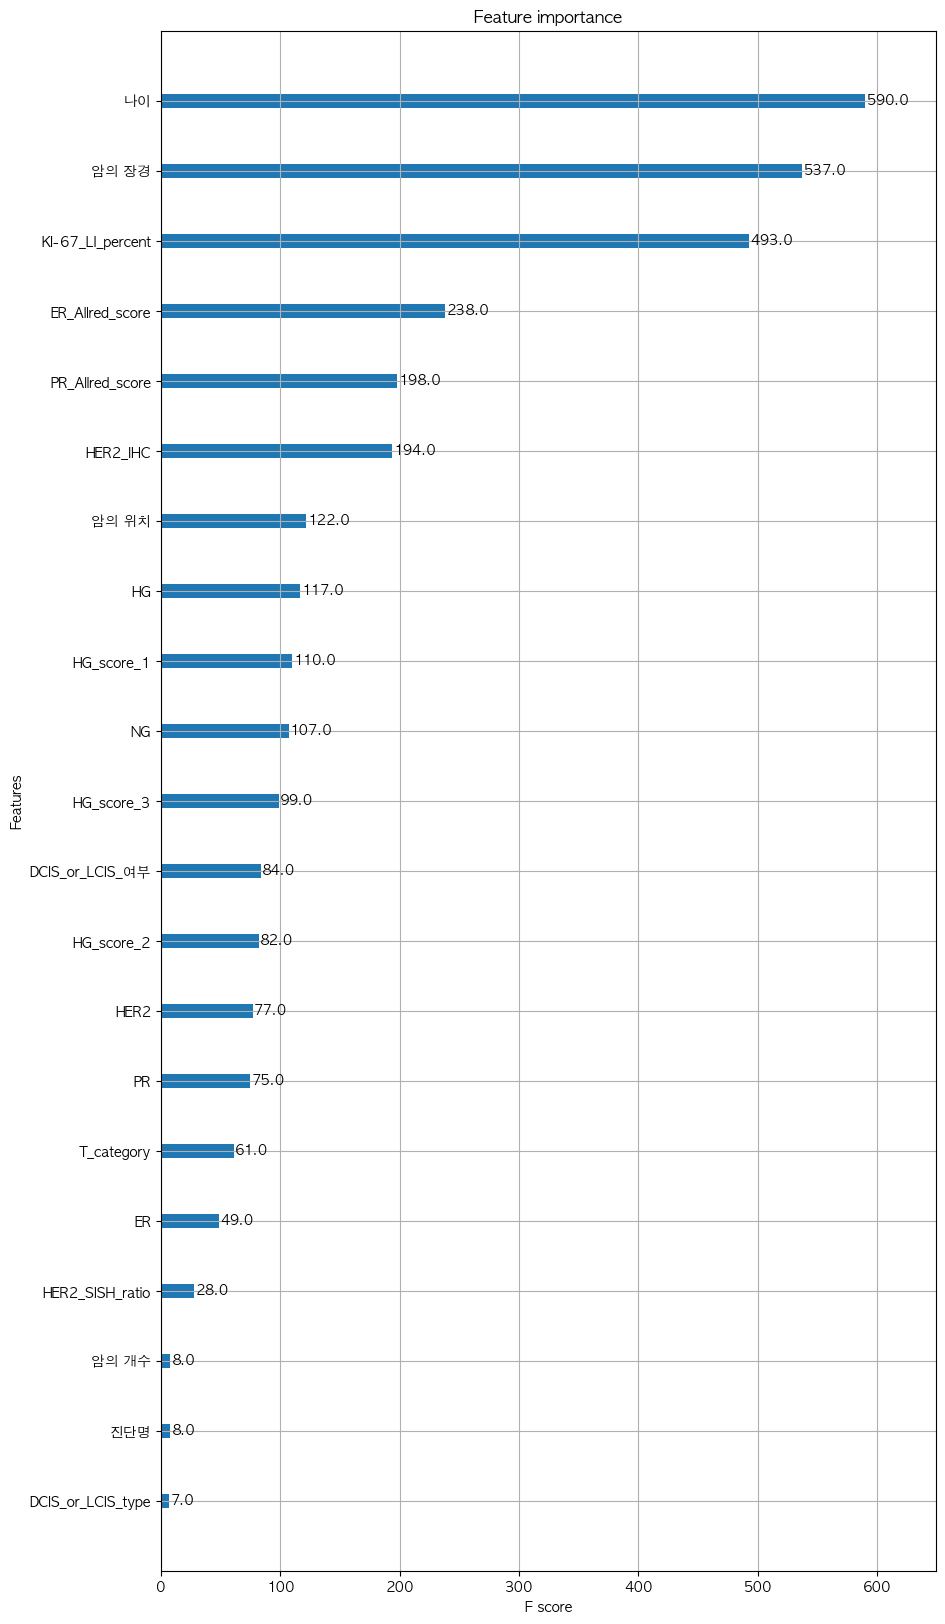

In [32]:
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic') 

fig, ax = plt.subplots(figsize=(10, 20))
xgb.plot_importance(rfc, ax=ax)
plt.show()